<a href="https://colab.research.google.com/github/Shreya-data/Play-Store-App-Reviews-Analysis/blob/main/Copy_of_playstore_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import required librabies
import pandas as pd                 #data manipulation
import numpy as np                  #data manipulation
import matplotlib.pyplot as plt     #visualization tool
%matplotlib inline
import seaborn as sns               #visualisation tool
import warnings  
warnings.filterwarnings("ignore")  #for ingoring warning
sns.set()

In [ ]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#import data from drive and introducing the variables to these dataset
play_store_data=pd.read_csv("/content/drive/MyDrive/Play Store Data.csv")
user_review_data=pd.read_csv("/content/drive/MyDrive/User Reviews.csv")


---
**Explore Play Store Dataset**
---

In [ ]:
#calling the variable of play store dataset
play_store_data.head()

In [ ]:
#column names
play_store_data.columns.values

---
**COLUMN NAMES OF PLAY STORE DATA**
---
**App**- Name of the apps.

**Category**- Category under which the app falls.

**Rating**- Applications rating in playstore.

**Reviews**- Number of reviews given to apps.

**Size**- Size of the apps.

**Installs**- Number of installs of the apps.

**Type**- app is free or paid.

**Price**- Price of the apps.

**Content Rating** - Appropriate target audience of the apps.

**Genres**- Genres under which the app fall.

**Last** **updated**- Date when the app last updated.

**Current** **Ver**- Current version of the apps.

**Android** **Ver**- The Android operating system the app is compatible with.

In [ ]:
#data understanding
print(f"There are total {play_store_data.shape[0]} rows and {play_store_data.shape[1]} columns in playstore dataframe.")

In [ ]:
#information about data
play_store_data.info()

In [ ]:
#statistical understanding of data
play_store_data.describe(include="all")

In [ ]:
#duplicates
print("Duplicate entry in play_store_data:",len(play_store_data[play_store_data.duplicated()])) #total number of duplicates

In [ ]:
#Remove Duplicates from playstore database
play_store_data1 = play_store_data.drop_duplicates() #remove duplicate 
play_store_data1.shape #shape after removing duplicates

In [ ]:
#making a DataFrame
def PlaystoreInfo():
  PSinfo_df = pd.DataFrame(index=play_store_data1.columns)
  PSinfo_df['Datatypes'] =  play_store_data1.dtypes
  PSinfo_df['Count of non-null values'] = play_store_data1.count()
  PSinfo_df['NaN values'] = play_store_data1.isnull().sum()
  PSinfo_df['% NaN Values'] = (PSinfo_df['NaN values']/len(play_store_data1)).round(4)*100 # or play_store_data1.isnull().mean()
  PSinfo_df['Unique_count'] = play_store_data1.nunique()
  return PSinfo_df
PlaystoreInfo() 


---
**Insights:**
---
From the above, we understand that except Rating columns, we are having a good dataset.

The number of null values are:

* **Rating** has 1465 null values which contributes 14.14% of the 
data.

* **Type** has 1 null value which contributes 0.01% of the data.

* **Content Rating** has 1 null value which contributes 0.01% of the data.

* **Current Ver** has 8 null values which contributes 0.08% of the data.

* **Android Ver** has 3 null values which contributes 0.03% of the data.

**We know that there is only one numeric type feature i.e. Rating.**

**Unique counts of Type and Content ratings are very small i.e. 3 and 6 respectively**

**Lets Explore The User Reviews Dataset**
---

In [ ]:
#calling the variable of user reviews dataset
user_review_data.head()

In [ ]:
#column names
user_review_data.columns.values

---
**COLUMN NAMES OF USER REVIEWS DATA**
---
**App** - The name of the application.

**Translated_Review** -Review text in English.

**Sentiment** - tells us about a view or opinion of the user with respect to the application, which can be positive, neutral, or negative.

**Sentiment_Polarity** - Sentiment in numerical form, ranging from -1.00 to 1.00.

**Sentiment_Subjectivity** - Measure of the expression of opinions, evaluations, feelings, and speculations


In [ ]:
#data understanding
print(f"There are total {user_review_data.shape[0]} rows and {user_review_data.shape[1]} columns in User Reviews dataframe.")

In [ ]:
#information about data
user_review_data.info()

In [ ]:
#Statistical understanding of data
user_review_data.describe(include="all")

In [ ]:
#duplicates
print("Duplicate entry in user_review_data:",len(user_review_data[user_review_data.duplicated()])) #total number of duplicates

In [ ]:
#Remove Duplicates from user_reviews database
user_review_data1 = user_review_data.drop_duplicates() #remove duplicate 
user_review_data1.shape #shape after removing duplicates

In [ ]:
#making a DataFrame
def UserReviewInfo():
  URinfo_df = pd.DataFrame(index=user_review_data1.columns)
  URinfo_df['Datatypes'] =  user_review_data1.dtypes
  URinfo_df['Count of non-null values'] = user_review_data1.count()
  URinfo_df['NaN values'] = user_review_data1.isnull().sum()
  URinfo_df['% NaN Values'] = (URinfo_df['NaN values']/len(user_review_data1)).round(4)*100 
  # or user_review_data1.isnull().mean()
  URinfo_df['Unique_count'] = user_review_data1.nunique()
  return URinfo_df
UserReviewInfo()

**Insights**
---

From the above, we understand that only for App column, we are having a good dataset.
There are so many of null values in dataset, we need to take care of that part.

The number of null values are:

* **Translated_Review** has 987 null values which contributes 3.22% of the data.
* **Sentiment** has 982 null values which contributes 3.20% of the data.

* **Sentiment_Polarity** has 982 null values which contributes 3.20% of the data.
* **Sentiment_Subjectivity** has 982 null values which contributes 3.20% of the data.

By Datatypes column, We know that there are two numeric type feature i.e. *Sentiment_Polarity* and *Sentiment_Subjectivity*.

Unique count of *Sentiment* are very small i.e. 3 .

**Data Filtering and Each Columns Data Operation**
---

**Filtering of User Reviews DataFrame**

In [ ]:
#drop NaN values from Translated_Review
user_review_data2 = user_review_data1.dropna(subset=["Translated_Review"],how="all") #store in another DataFrame
#call the new DataFrame to check whether null values present or not
user_review_data2.isnull().sum()

In [ ]:
user_review_data3 = user_review_data2.drop(columns=["Translated_Review"]) # there is no need to know about Review text in English.
user_review_data3.shape

**App Column Operation**
--

In [ ]:
duplicate_in_app = play_store_data1[play_store_data1.duplicated('App')] #Total apps is not matching with unique values of app so checking duplicate apps and drop it
duplicate_in_app.shape[0]

In [ ]:
#Remove Duplicates from App Column
play_store_data2 = play_store_data1.drop_duplicates(subset='App',keep='last') 
play_store_data2

**Category Column Operation**
--

In [ ]:
#first checking the values in the Category column.
pd.DataFrame(play_store_data2['Category'].value_counts(ascending=False))

In [ ]:
#getting top 5 categories
pd.DataFrame(play_store_data2['Category'].value_counts(ascending=False)).head()

In [ ]:
#1.9 look like a outliner therefore checking data
play_store_data2[play_store_data2['Category'] == '1.9']

In [ ]:
#by mistake dataentry is wrong,so will shift rows from category column and correct it
from copy import deepcopy
missing_entry = deepcopy(play_store_data2.loc[10472])
missing_entry[1:] = missing_entry[1:].shift(periods=1)
play_store_data2.loc[10472] = missing_entry
# # remove the temporary variable
del missing_entry


In [ ]:
#crosscheck data with google playstore and update category 
play_store_data2.loc[10472, 'Category'] = 'LIFESTYLE'
play_store_data2.loc[10472]


**Rating Column Operation**
--

In [ ]:
#null values in Rating column
play_store_data2['Rating'].isnull().sum()

In [ ]:
#fill null values by median
x=play_store_data2.Rating.median()
play_store_data2.Rating.fillna(x,inplace=True)
play_store_data2["Rating"].isnull().sum()

In [ ]:
#datatype of all the columns
play_store_data2.dtypes

In [ ]:
#know about null values
play_store_data2.isnull().sum()

In [ ]:
#changing the datatype of rating
play_store_data2['Rating'] = play_store_data2['Rating'].astype('float64')
play_store_data2['Rating'].dtype

In [ ]:
#finding outliers
play_store_data2["Rating"][play_store_data2["Rating"]>5].count()

In [ ]:
#analysis the Rating column that Rating greater than and equal to 4.0 to know the count of high rating app
play_store_data2["Rating"][play_store_data2["Rating"]>=4.0].count()

**Reviews Column Operation**
--

In [ ]:
#null values in Reviews column
play_store_data2['Reviews'].isnull().sum()

In [ ]:
#changing datatype of Reviews column
play_store_data2['Reviews'] = play_store_data2['Reviews'].astype('int')
play_store_data2['Reviews'].dtype


**Installs Column Operation**
--

In [ ]:
#removing unnecessary characters and save as play_store_data2
play_store_data2=play_store_data2.replace('[+,$]','',regex=True)
play_store_data2.head()

In [ ]:
#changing Datatype of Installs column
play_store_data2['Installs']=play_store_data2['Installs'].astype('int')
play_store_data2['Installs'].dtype

In [ ]:
#analysis the count of install of Apps greater than and equal to 1 billion
print(play_store_data2[play_store_data2['Installs']>=1000000000].shape[0])
play_store_data2[play_store_data2['Installs']>=1000000000]

**Type Column Operation**
--

In [ ]:
play_store_data2['Type'].unique() #Find Unique Values From Type Columns

In [ ]:
play_store_data2[play_store_data2.Type.isnull()] #finding NaN data row

In [ ]:
play_store_data2.loc[9148, 'Type'] = 'Free' #Check with playstore and replace with Free since Price=0 
play_store_data2.loc[9148]

In [ ]:
play_store_data2['Type'].unique() #Find Unique Values From Type Columns

**Size Columns Operation**
--

In [ ]:
#Convert all size to KB so Each M have to Multiply with 1024
#Removing "M", Changing Size To KB
play_store_data2['Size'] = play_store_data2['Size'].map(
    lambda value :
        str(int(float(value.rstrip('M')) * 1024)) if value[-1] == 'M' else value
)

# Removing "k"
play_store_data2['Size'] = play_store_data2['Size'].map(
    lambda value :
        str(value.rstrip('k')) if value[-1] == 'k' else value
)

# Setting "Varies with device" to NaN
play_store_data2['Size'] = play_store_data2['Size'].map(
    lambda value :
        np.nan if value == 'Varies with device' else value
)

In [ ]:
#unique values
play_store_data2['Size'].unique()

In [ ]:
#again changing the Datatype
play_store_data2['Size']=play_store_data2['Size'].astype('float') 

In [ ]:
#in order to deal with null values, we replace it to median of the Size column
play_store_data2['Size'].replace([np.nan], play_store_data2['Size'].median(), inplace=True)

In [ ]:
#rechecking the null values
play_store_data2['Size'].isnull().sum()

In [ ]:
# analysis that App Size <= 50MB to know about the count of low storage app
play_store_data2[play_store_data2["Size"]<=50*1024].shape[0]

**Price Columns Operation**
--

In [ ]:
#count of null values in Price column
play_store_data2['Price'].isnull().sum()

In [ ]:
#changing datatype "object"(i.e. categorical datatype) to "Float"(i.e. numerical datatype)
play_store_data2['Price'] = play_store_data2['Price'].astype('float64')
play_store_data2['Price'].dtype


 **Content Rating Column Operation**
--

In [ ]:
#count the values in Content Rating
play_store_data2['Content Rating'].value_counts()

In [ ]:
#null values in Content Rating
play_store_data2['Content Rating'].isnull().sum()

 **Genres Column Operation**
--

In [ ]:
#row of null value of Genres in the dataset
play_store_data2[play_store_data2.Genres.isnull()]

In [ ]:
l1=play_store_data2[play_store_data2["Category"]=="LIFESTYLE"]
print(l1)
a=l1.groupby(['Category'])['Genres'].agg(pd.Series.mode)


In [ ]:
play_store_data2["Genres"]=play_store_data2["Genres"].replace(np.nan, "Lifestyle")

In [ ]:
play_store_data2.isnull().sum()

In [ ]:
play_store_data2["Genres"].value_counts()

 **Current Ver Column Operation**
--

In [ ]:
CurrentVer_count=pd.value_counts(play_store_data2["Current Ver"], sort=True)
CurrentVer_count

**Android Ver Column Operation**
--

In [ ]:
AndroidVer_count=pd.value_counts(play_store_data2["Android Ver"], sort=True)
a=AndroidVer_count.head(15)
a

**Last Updated Column Operation**
--

In [ ]:
play_store_data2['Last Updated'] = pd.to_datetime(play_store_data2['Last Updated'])
play_store_data2['Last Updated']

In [ ]:
play_store_data2['LastUpdated_Day']=play_store_data2['Last Updated'].dt.day
play_store_data2['LastUpdated_Month']=play_store_data2['Last Updated'].dt.month
play_store_data2['LastUpdated_Year']=play_store_data2['Last Updated'].dt.year

In [ ]:
play_store_data2.info()

In [ ]:
play_store_data2.isnull().sum()

**Seperate Numerical And Categorical Data**
--

In [ ]:
#for numerical data
num_df_columns=[columns for columns in play_store_data2.columns if play_store_data2[columns].dtype!='O']
num_df_columns

In [ ]:
num_df=play_store_data2[num_df_columns]
num_df

In [ ]:
#for categorical Data
cat_df_columns=[columns for columns in play_store_data2.columns if play_store_data2[columns].dtype=='O']
cat_df_columns

In [ ]:
cat_df=play_store_data2[cat_df_columns]
cat_df

###**lets take user reviews dataset**
---

In [ ]:
#user_reviews dataset
user_review_data3.head()

**Sentiment data**
---

In [ ]:
user_review_data3["Sentiment"].value_counts()*100/user_review_data3["Sentiment"].count()

**EDA OF Playstore Data**
--

**Which Android Version Supported the Apps ?**
--

In [ ]:
AndroidVer_count.value_counts()

In [ ]:
plt.figure(figsize=(15,10))
a.plot(kind = 'pie',autopct='%1.02f%%',shadow=True)
plt.title('Android Version Supported Apps',size=20)
plt.show()

**Summary**: After percentage frequency distribution of data,

 we conclude that-

android version 4.0 and above supported apps is very higher and more than 60% of total app support.

**Frequency of apps in each category ?**
--

In [ ]:
plt.figure(figsize=(15,10))

y = play_store_data2['Category'].value_counts().index
x = play_store_data2['Category'].value_counts()
sns.barplot(x, y)
plt.xlabel("Count",fontsize=15)
plt.ylabel("Category",fontsize=15)
plt.title("frequency of app in each categories ", fontsize = 20);

**Summary**:
From above Bar chart,

we conclude that-

most of the apps on play Store belongs to family category.

**Genres wise top apps in playstore**
--

In [ ]:
y = play_store_data2['Genres'].value_counts().index
x = play_store_data2['Genres'].value_counts().head(10)
X = []
Y= []
for i in range(len(x)):
    X.append(x[i])
    Y.append(y[i])

plt.figure(figsize=(15,5))
plt.xlabel("Count",fontsize=15)
plt.ylabel("Genres",fontsize=15)

graph = sns.barplot(x = X, y = Y)
graph.set_title("Top Genres on Playstore", fontsize = 20)
plt.show()

**summary:**
Tools genre have the highest count followed by Entertainment

**Most Frequent Rating on playstore Apps**
--

In [ ]:
plt.figure(figsize=(15,5))
sns.kdeplot(play_store_data2.Rating, color="#4B0751", shade = True)
plt.xlabel("Rating",fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.title('Most Frequent Rating',size = 20)
plt.show()

**Summary**:

from the above graph, we conclude that most of the Apps in Play Store are rated in the region of 4 to 4.8.

**Distribution of Free and Paid App**
--

In [ ]:
plt.figure(figsize=(15,10))
x=play_store_data2.Type.value_counts()
Colors = ['#ff9999','#66b3ff']
label=["Free","Paid"]
plt.pie(x,labels=label,autopct="%1.2f%%",shadow=True,explode=[ 0, 0.1],startangle=45,colors=Colors)
plt.title("Free  v/s  Paid", fontsize=20)
plt.legend()
plt.show()

**Summary-4**:

* Free apps in playstore are 92.19%

* Paid apps in playstore are 7.81%



**App Updation Details By Year**
--

In [ ]:
plt.figure(figsize=(15,5))
plt.title("Apps updation by years", fontsize=20)
ax = plt.hist(play_store_data2.LastUpdated_Year, color="#ffcc99")
plt.tick_params(left='on', bottom='on') 
plt.xlabel("Year",size=15)
plt.ylabel("Number of apps updated",size=15)
plt.show() 

In [ ]:
m1=play_store_data2[play_store_data2["Type"]=="Free"]
m1

In [ ]:
#sns.barplot(play_store_data2["LastUpdated_Month"],m1["Type"])
h=pd.value_counts(m1["LastUpdated_Month"]).sort_values()
sns.countplot(h)

**Summary:** 
from the above graph,

we conclude that -

most of the last update of apps on Play Store are in the year of 2017 and 2018.

**Distribution of Content Rating for all app**
--

In [ ]:
plt.figure(figsize=(15,10))
colors=["#bd7ebe", "#ffee65", "#beb9db", "#fdcce5", "#8bd3c7"]
pd.value_counts(play_store_data2["Content Rating"]).plot(kind = 'pie',  autopct='%1.2f%%', shadow=True,colors=colors)
plt.show()

**Summary:**
from the above pie chart,

we conclude that most of the app in Play Store is accessible by everyone.

**Content Rating in Free and Paid**
--

In [ ]:
plt.figure(figsize=(15,10))

ax = sns.countplot(play_store_data2['Content Rating'],hue=play_store_data2['Type'],palette="Set3")

plt.title("Content Rating in Free and Paid",size=20)

for p in ax.patches:
   ax.annotate(p.get_height(),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',size= 12)
    
plt.show()

**Summary:**
from the above chart,

 we conclude that:

 most of the apps in PlayStore are free and accessible by everyone.

<BarContainer object of 9660 artists>

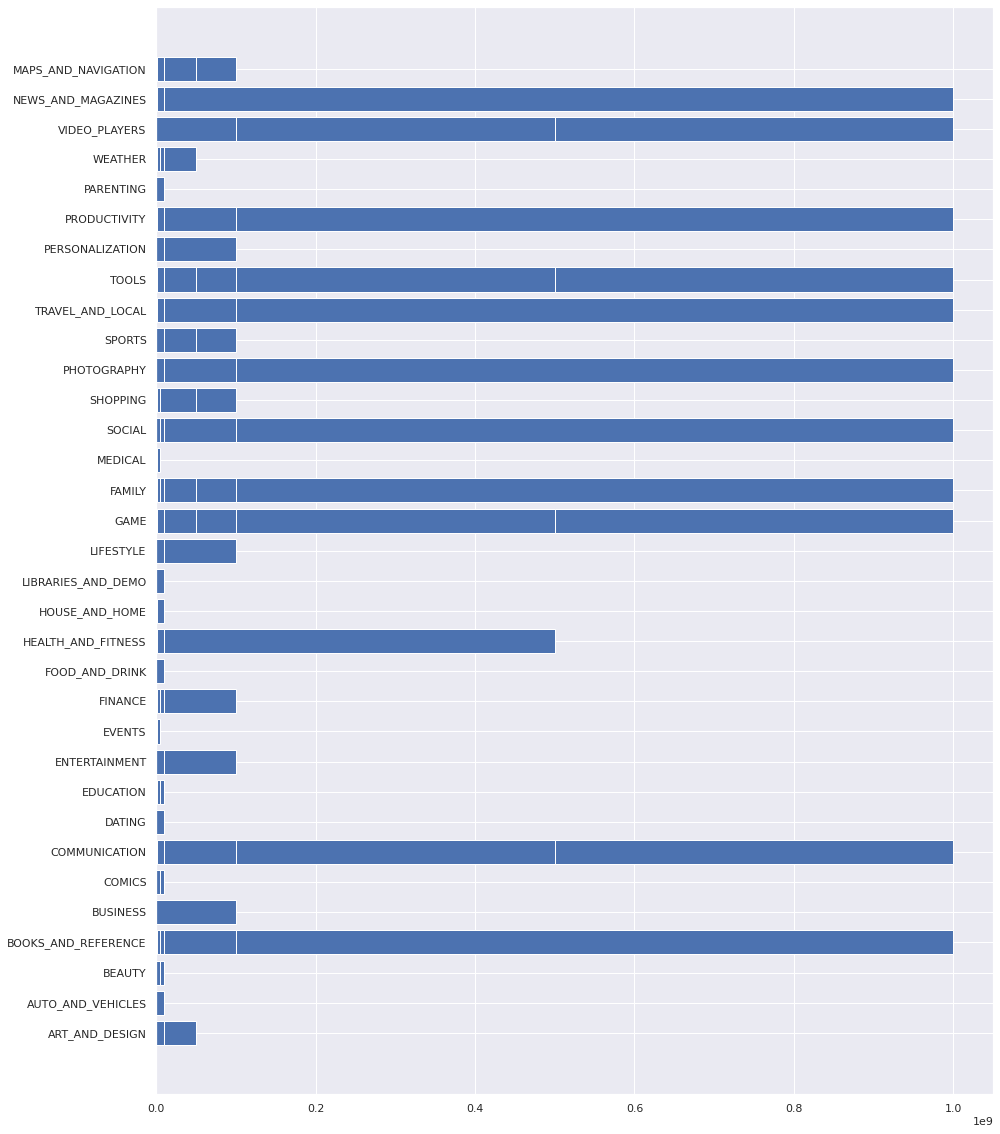

In [ ]:
#install v/s category
plt.figure(figsize=(15,20))
plt.barh(play_store_data2["Category"],play_store_data2["Installs"])

**Apps Size Across Database**
-- 

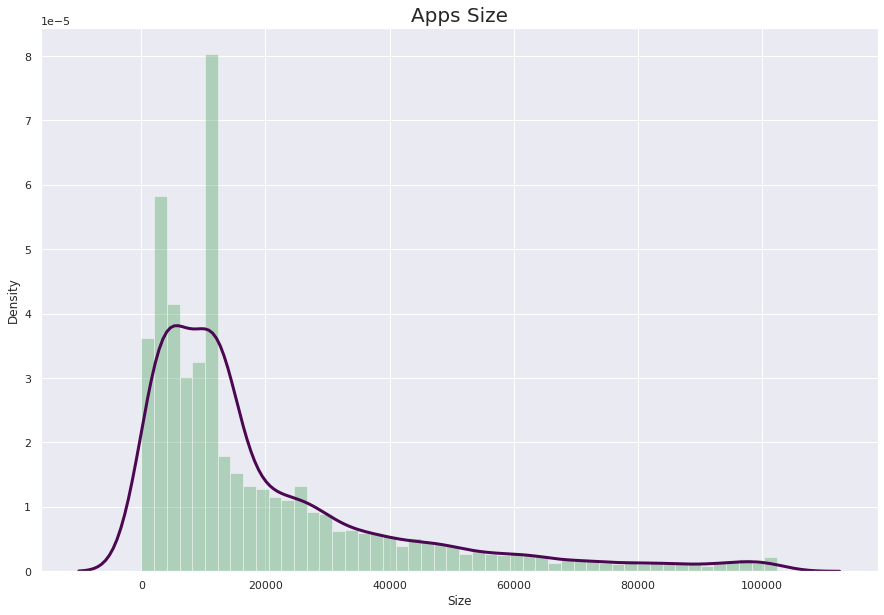

In [ ]:
#Histogram for Size
plt.figure(figsize=(15,10))
sns.distplot(play_store_data2['Size'],color='g',kde_kws={'linewidth':3,'color':'#4B0751'});
plt.title("Apps Size",size=20)
plt.show()

**Summary:**
we conclude that-

most of the apps in playstore of size between 0 to 20000kb.

In [ ]:
#merge both database for more analysis

merged_df = play_store_data2.merge(user_review_data3, on="App")
merged_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,LastUpdated_Day,LastUpdated_Month,LastUpdated_Year,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33792.0,1000000,Free,0.0,Everyone,Art & Design,2017-09-20,2.9.2,3.0 and up,20,9,2017,Positive,2.166667e-01,0.573810
1,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33792.0,1000000,Free,0.0,Everyone,Art & Design,2017-09-20,2.9.2,3.0 and up,20,9,2017,Neutral,0.000000e+00,0.000000
2,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33792.0,1000000,Free,0.0,Everyone,Art & Design,2017-09-20,2.9.2,3.0 and up,20,9,2017,Positive,3.000000e-01,0.600000
3,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33792.0,1000000,Free,0.0,Everyone,Art & Design,2017-09-20,2.9.2,3.0 and up,20,9,2017,Positive,2.775558e-17,0.579167
4,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33792.0,1000000,Free,0.0,Everyone,Art & Design,2017-09-20,2.9.2,3.0 and up,20,9,2017,Negative,-3.472222e-02,0.581944


In [ ]:
e=merged_df[merged_df["Sentiment"]=="Positive"].sort_values(by='Sentiment_Polarity', ascending=False)
e

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,LastUpdated_Day,LastUpdated_Month,LastUpdated_Year,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
16458,Hideman VPN,TOOLS,4.1,88675,9830.0,5000000,Free,0.00,Everyone,Tools,2018-07-24,6.0.1,4.0 and up,24,7,2018,Positive,1.000000e+00,0.780000
22912,365Scores - Live Scores,SPORTS,4.6,666246,25600.0,10000000,Free,0.00,Everyone,Sports,2018-07-29,5.5.9,4.1 and up,29,7,2018,Positive,1.000000e+00,1.000000
668,Filters for Selfie,BEAUTY,4.3,8572,25600.0,1000000,Free,0.00,Everyone,Beauty,2018-05-10,1.1.0,4.0 and up,10,5,2018,Positive,1.000000e+00,1.000000
10966,ABC Kids - Tracing & Phonics,FAMILY,4.5,36606,12288.0,10000000,Free,0.00,Everyone,Educational;Education,2018-06-22,Varies with device,4.0 and up,22,6,2018,Positive,1.000000e+00,0.300000
16198,Fraction Calculator Plus Free,TOOLS,4.5,148506,11264.0,5000000,Free,0.00,Everyone,Tools,2018-07-15,Varies with device,Varies with device,15,7,2018,Positive,1.000000e+00,0.650000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8873,Farming Simulator 18,GAME,4.5,18125,15360.0,100000,Paid,4.99,Everyone,Simulation;Education,2018-07-09,Varies with device,4.4 and up,9,7,2018,Positive,1.387779e-17,0.766667
25399,All Social Networks,SOCIAL,4.2,22650,1536.0,1000000,Free,0.00,Everyone,Social,2018-05-21,2.4.12,4.0 and up,21,5,2018,Positive,1.387779e-17,0.594792
14739,Amtrak,TRAVEL_AND_LOCAL,3.7,16815,28672.0,1000000,Free,0.00,Everyone,Travel & Local,2018-07-15,3.1.3,5.0 and up,15,7,2018,Positive,9.251859e-18,0.500000
12764,Blogger,SOCIAL,3.7,138026,2764.0,5000000,Free,0.00,Mature 17,Social,2016-02-29,2.1.3,2.1 and up,29,2,2016,Positive,6.938894e-18,0.612500


In [ ]:
sns.countplot(x=e["Sentiment_Polarity"],data=e)

In [ ]:
#for numerical data
num_df_columns1=[columns for columns in merged_df.columns if merged_df[columns].dtype!='O']
num_df2=merged_df[num_df_columns1].drop(columns=['LastUpdated_Day','LastUpdated_Month',"LastUpdated_Year"])
num_df2

In [ ]:
merged_df.info()

**Sentiment Data Across all Reviews**
--

In [ ]:
plt.figure(figsize=(15,10))
pd.value_counts(user_review_data3["Sentiment"]).plot(kind = 'pie',  autopct='%1.2f%%',shadow=True, explode=[0, 0.05, 0.05], startangle=45 ,colors=colors)
plt.title("Sentiment Data",size=20)
plt.show()

**Trend of App Price across popular categories**
--

In [ ]:
plt.figure(figsize=(15,10))

# Select a few popular app categories
popular_app_cats = play_store_data2[play_store_data2.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY', 'MEDICAL', 'TOOLS', 'FINANCE','LIFESTYLE','BUSINESS'])]

# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'], jitter=True, linewidth=1 , size=8)
ax.set_title('Trend of App Price across popular categories',size=20)
plt.show()

**Age vs Sentiment: each age with its Positive, Negative, Neutral Sentiment**
--

In [ ]:
plt.figure(figsize=(15,10))
ax = sns.countplot(merged_df["Content Rating"],hue=merged_df['Sentiment'],palette="Set3");
plt.title("Age vs Sentiment",size=20)

for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',size= 12)

plt.show()

**Feedback in Popular app category**
--

In [ ]:
plt.figure(figsize=(15,10))
ax = sns.countplot(popular_app_cats['Category'],hue=merged_df['Sentiment']);
ax.set_title("Feedback in Popular app catagory \n \n Category v/s Sentiment ",size=20)

for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',size= 12)
    
plt.show()

**Popular Category vs Type**
--

In [ ]:
plt.figure(figsize=(15,10))
ax = sns.countplot(popular_app_cats['Category'],hue=merged_df['Type']);
plt.title("Popular Category vs Type",size=20)

for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',size= 12)
    
plt.show()

**Sentiment_Polarity relation with paid and Free App**
--

In [ ]:
plt.figure(figsize=(15,10))
sns.violinplot(y = merged_df["Sentiment_Polarity"],x = merged_df["Type"],palette="Blues" )
plt.title("Sentiment Polarity",fontsize=20)
plt.show()

**Content Rating Relation with Sentiment Polarity**
--

In [ ]:
plt.figure(figsize=(15,10))
ax = sns.stripplot(y = merged_df["Content Rating"], x = merged_df["Sentiment_Polarity"], data=merged_df, color="#4B0751", jitter=0.2, size=2.5)

plt.show()


**Categories Relation with Sentiment_Subjectivity**
--

In [ ]:
data = sns.pairplot(num_df, markers='+')
plt.show(data)

In [ ]:
plt.figure(figsize=(15,10))

ax = sns.stripplot(y = popular_app_cats['Category'], x = merged_df["Sentiment_Subjectivity"], data=merged_df, color="#4B0751", jitter=0.2, size=2.5)

plt.show()


**Pair Plot For Understanding Relations Between Different Columns**
--

In [ ]:
# data = sns.pairplot(num_df, markers='+')
# plt.show(data)

**Summary-2**: Following are main conclusion:
--

### A)	Install vs Rating 📈  --	apps with Rating 4 and above have more installation than any other apps with lower rating!

### B)	Size vs Rating 📈 	-- Mostly larger size app's are rated and near 4 rate!

**Relation between all the columns**
--

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(num_df2.corr(),annot=True,cmap='Greens')
plt.title("Correlation on merge data",fontsize=25)
plt.show()

In [ ]:
#revenue=installs*price
play_store_data2["Price"]

In [ ]:
list1=[]
for i,j in zip(play_store_data2["Installs"],play_store_data2["Price"]):
  d=i*j
  list1.append(d)

print(list1)  

In [ ]:
Revenue=pd.DataFrame(list1,columns=["Revenue"])
Revenue.reset_index()

In [ ]:
play_store_data2=play_store_data2.reset_index()

In [ ]:
df4=pd.concat([play_store_data2,Revenue],axis=1)
df4

In [ ]:
df5=df4.sort_values(by="Revenue",ascending=False)
df5

In [ ]:
fdf5=df5[["App","Revenue","Category"]].reset_index().drop(columns=["index"])
fdf5

In [ ]:
f=df5.groupby("Category",as_index=False)["Revenue"].sum()
g=pd.DataFrame(f)
p=g.sort_values(by="Revenue",ascending=False).head(15)
p

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x=p["Revenue"],y=p["Category"],data=p,palette="Set3")
plt.title("Revenue generated by Category",fontsize=20)
plt.show()

In [ ]:
sns.countplot(fdf5["Revenue"].head(10))